In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ANOVA F-value For Feature Selection Data Pure

In [82]:
def anovaF(X,y,umbral):
    f_value = SelectKBest(f_classif)
    X_best = f_value.fit(X,y)
    fig, ax = plt.subplots(figsize = (20,10))
    scores = X_best.scores_
    print(scores)
    ax = plt.rcParams["figure.figsize"] = [24,18]
    ax = plt.plot(scores)
    plt.xticks(np.arange(36),np.arange(36), size = 15 )
    plt.yticks(size = 15)
    bestScore = lambda x: x >= umbral
    bestScore = pd.Series(bestScore(scores))
    return bestScore[bestScore].index


# ExtraTreesClassifier Data Pure

In [83]:
def treesClassifierData(X,y):
    clf = ExtraTreesClassifier(n_estimators = 36)
    clf = clf.fit(X,y)
    model = SelectFromModel(clf, prefit=True)
    best_features_segundo_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_segundo_metodo

# LDA Data Pure

In [84]:
def ldaData(X,y):
    lda = LinearDiscriminantAnalysis(n_components=None)
    X_lda = lda.fit(X, y)
    X_lda
    model = SelectFromModel(X_lda, prefit=True)
    best_features_tercer_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_tercer_metodo

# Load Data

### Data Pure

In [85]:
data_i = pd.read_csv('dataA.csv')
data_i.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,0.364172,-0.700949,-0.804477,-0.943635,-0.31695,-0.898724,-0.625504,0.37276,0.580955,0.446664,...,1,0,0,1,0,0,1,0,0,0


Anova, chi2, forward selection, backward selection, Recursive Feature Elimination, Lasso, Ridge

In [86]:
temp = data_i.select_dtypes(['float64'])
y = data_i['Type_mine']
X = temp

### Select Feature


[1239.96745042 3241.39110214 2953.15608804 2577.67611238  797.0659192
 1725.15470738 3681.46940604  571.82900553  619.52643777  677.53082168
  707.8752932   367.86393493 1801.15924089 1667.80763403 1475.30990268
 1616.21012706  762.57854378  828.56238456  840.76184689 1139.85254764
 1535.9378902  1696.27160765 3992.55589511 3802.17718051  604.89966563
  128.2655685 ]


Index(['p1_d', 'p2_d', 'min_d', 'second_sp', 'second_dp'], dtype='object')

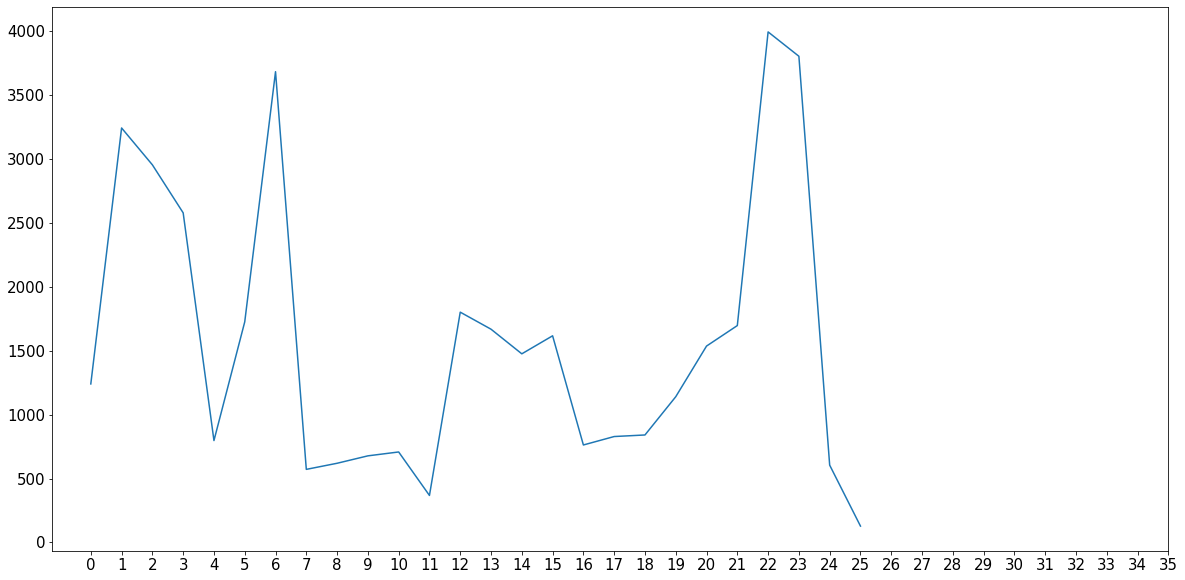

In [87]:
bestF1Me = anovaF(X,y,2700)
bestF1Me = temp.columns[bestF1Me]
bestF1Me

In [88]:
bestF2Me = treesClassifierData(X,y)
bestF2Me

Index(['p2_d', 'p3_d', 'min_d', 'first_sp', 'first_dp', 'p2_ib', 'second_sp',
       'second_dp'],
      dtype='object')

In [89]:
bestF3Me = ldaData(X,y)
bestF3Me

Index(['#sp', '#dp', 'first_sp', 'first_dp', 'p1_ip', 'p2_ip', 'p3_ib',
       'second_sp', 'second_dp'],
      dtype='object')

In [90]:
best_pure = np.concatenate([bestF1Me,bestF2Me,bestF3Me])
best_pure = np.unique(best_pure)
best_pure

array(['#dp', '#sp', 'first_dp', 'first_sp', 'min_d', 'p1_d', 'p1_ip',
       'p2_d', 'p2_ib', 'p2_ip', 'p3_d', 'p3_ib', 'second_dp',
       'second_sp'], dtype=object)

### Data No Pure

In [92]:
data_n = pd.read_csv('dataB.csv')
data_n.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
0,4.553656,-0.037927,-0.055406,-0.142137,15.85042,-0.126105,-0.01812,43.732192,127.789591,32.184816,...,0.725482,5.594429,-0.046617,0.189553,3.916348,0,0,1,0,1


In [96]:
data_n.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine'],
      dtype='object')

In [100]:
temp = temp.reindex(columns=['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine'])
temp.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine'],
      dtype='object')

In [94]:
temp = data_i.drop(['Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero','Type_not_mine'], axis = 1)

In [101]:
data_n = pd.concat([data_n, temp[temp['Type_mine'] == 0]], axis = 0)

In [102]:
import random
data_n = data_n.reset_index()
indices = list(data_n.index)
random.shuffle(indices)
data_n = data_n.reindex(indices)
data_n.head(1)

,index,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine
6557,6557,-0.033373,-0.037927,-0.064791,0.025588,-0.100731,0.029758,-0.01812,-0.049162,-0.023033,...,-0.188257,0.489591,-0.095017,-0.082918,-0.224718,0,1,0,0,1


In [105]:
temp = data_n.select_dtypes(['float64'])
y = data_n['Type_mine']
X = temp

### Select Feature

[ 420.92457812  904.7487895   851.89911986  778.45431807  290.11523557
  585.12980178  976.71783277  216.0623241   232.20752455  251.59230445
  264.85020514  143.96019777  563.30155575  531.5287672   527.79651599
 1000.44541346  231.31297321  565.4983826   975.83412066   54.03158633
  309.79725178  332.56344286  336.34253978  433.30594684  546.87303629
  587.65993184]


Index(['p1_d', 'p2_d', 'p3_d', 'max_d', 'min_d', '#sp', '#dp', 'first_sp',
       'second_sp', 'first_dp', 'second_dp', 'p2_ib', 'p3_ib'],
      dtype='object')

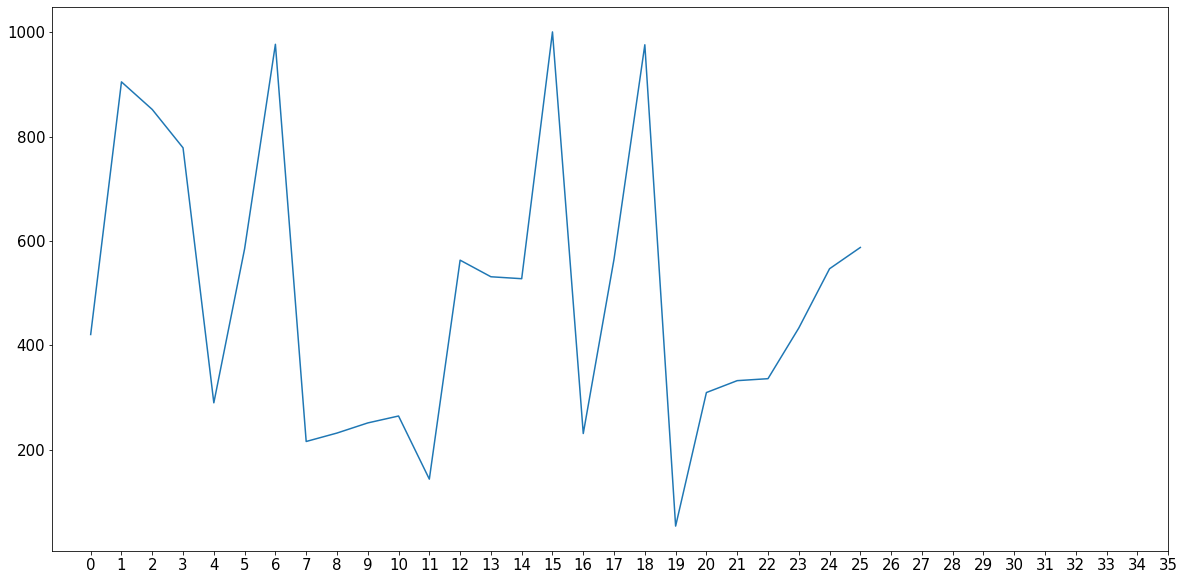

In [107]:
bestF1Me = anovaF(X,y,500)
bestF1Me = temp.columns[bestF1Me]
bestF1Me

In [108]:
bestF2Me = treesClassifierData(X,y)
bestF2Me

Index(['p2_d', 'min_d', 'first_sp', 'third_sp', 'first_dp', 'second_dp',
       'p1_ib', 'p2_ib'],
      dtype='object')

In [109]:
bestF3Me = ldaData(X,y)
bestF3Me

Index(['duration', 'max_d', '#packets', '#sp', '#dp'], dtype='object')

In [110]:
best_n_pure = np.concatenate([bestF1Me,bestF2Me,bestF3Me])
best_n_pure = np.unique(best_n_pure)
best_n_pure

array(['#dp', '#packets', '#sp', 'duration', 'first_dp', 'first_sp',
       'max_d', 'min_d', 'p1_d', 'p1_ib', 'p2_d', 'p2_ib', 'p3_d',
       'p3_ib', 'second_dp', 'second_sp', 'third_sp'], dtype=object)

In [111]:
best_pure

array(['#dp', '#sp', 'first_dp', 'first_sp', 'min_d', 'p1_d', 'p1_ip',
       'p2_d', 'p2_ib', 'p2_ip', 'p3_d', 'p3_ib', 'second_dp',
       'second_sp'], dtype=object)

In [112]:
best_n_pure

array(['#dp', '#packets', '#sp', 'duration', 'first_dp', 'first_sp',
       'max_d', 'min_d', 'p1_d', 'p1_ib', 'p2_d', 'p2_ib', 'p3_d',
       'p3_ib', 'second_dp', 'second_sp', 'third_sp'], dtype=object)